In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/yben409/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yben409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
lemmatizer = WordNetLemmatizer()

def remove_stop_words(text):
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return clean_text

def tokenize_text(text):
    return nltk.word_tokenize(text)

def lemmatize_sentence(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_sentence = ' '.join(lemmatized_tokens)
    return lemmatized_sentence

In [16]:
data1 = pd.read_csv('d_tweets.csv', sep=',')
data2 = pd.read_csv('non_d_tweets.csv', sep=',')
data_main = pd.read_csv('dataset.csv', sep=';')

In [17]:
X_d = data1['tweet'] #Depressing tweets
X_non_d = data2['tweet'] #Non depression tweets

In [18]:
ones_df = pd.DataFrame({'is_depression': [1] * len(X_d)})
data_d = pd.concat([X_d, ones_df], axis=1)
data_d.columns = ['tweets', 'is_depression']

In [20]:
zeros_df = pd.DataFrame({'is_depression': [0] * len(X_non_d)})
data_non_d = pd.concat([X_non_d, zeros_df], axis=1)
data_non_d.columns = ['tweets', 'is_depression']
data_non_d

,tweets,is_depression
0,Touch Passes are the new ASMR,0
1,"12 years ago, I called my dad and he gave me s...",0
2,"There are 6,500 languages yet I choose to only...",0
3,"Hey everyone, ask for a raise today. I’m tell...",0
4,I invested in 47 startups in a year. Here's ho...,0
...,...,...
4804,Cardi B wants to trademark her catchphrase “Ok...,0
4805,I’ll bet Kellyanne and George Conway have pret...,0
4806,Fans are always asking me how they can watch t...,0
4807,"Ray Romano is a hilarious comedian, a kind sou...",0


In [30]:
dataset = pd.concat([data_d, data_main, data_non_d], axis=0)
dataset = dataset.reset_index(drop=True)
dataset

,tweets,is_depression
0,the real reason why you're sad? you're attache...,1
1,my biggest problem is overthinking everything,1
2,the worst sadness is the sadness you've taught...,1
3,i cannot make you understand. i cannot make an...,1
4,i don't think anyone really understands how ti...,1
...,...,...
16031,Cardi B wants to trademark her catchphrase “Ok...,0
16032,I’ll bet Kellyanne and George Conway have pret...,0
16033,Fans are always asking me how they can watch t...,0
16034,"Ray Romano is a hilarious comedian, a kind sou...",0


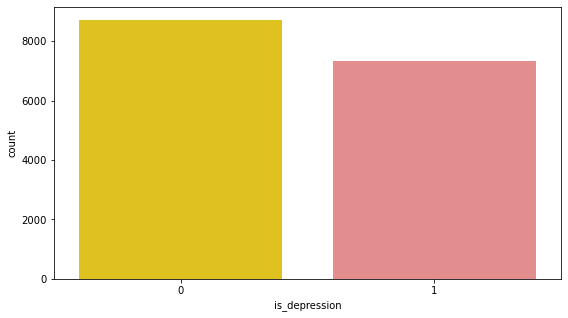

In [31]:
classes_num = dataset['is_depression'].value_counts()

# Define a custom color palette
custom_palette = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='is_depression', palette=custom_palette)

plt.show()

In [32]:
#Small difference in distribution of classes. Good ! 

In [34]:
dataset['tweets'] = dataset['tweets'].str.lower()
dataset['tweets']

0        the real reason why you're sad? you're attache...
1            my biggest problem is overthinking everything
2        the worst sadness is the sadness you've taught...
3        i cannot make you understand. i cannot make an...
4        i don't think anyone really understands how ti...
                               ...                        
16031    cardi b wants to trademark her catchphrase “ok...
16032    i’ll bet kellyanne and george conway have pret...
16033    fans are always asking me how they can watch t...
16034    ray romano is a hilarious comedian, a kind sou...
16035    mueller's report may be finished, but mine is ...
Name: tweets, Length: 16036, dtype: object

In [38]:
dataset['tweets'] = dataset['tweets'].str.replace(r'[^\w\s]+', '',regex=True)
dataset['tweets'] = dataset['tweets'].apply(remove_stop_words)
dataset['tweets'] = dataset['tweets'].map(tokenize_text)
dataset['tweets'] = dataset['tweets'].map(lemmatize_sentence)

In [39]:
dataset['tweets']

0        real reason youre sad youre attached people di...
1                  biggest problem overthinking everything
2                  worst sadness sadness youve taught hide
3        can not make understand can not make anyone un...
4        dont think anyone really understands tiring ac...
                               ...                        
16031    cardi b want trademark catchphrase okurr think...
16032    ill bet kellyanne george conway pretty disturb...
16033    fan always asking watch old stuff finally answ...
16034    ray romano hilarious comedian kind soul rare n...
16035    muellers report may finished mine next week jo...
Name: tweets, Length: 16036, dtype: object

In [41]:
dataset

,tweets,is_depression
0,real reason youre sad youre attached people di...,1
1,biggest problem overthinking everything,1
2,worst sadness sadness youve taught hide,1
3,can not make understand can not make anyone un...,1
4,dont think anyone really understands tiring ac...,1
...,...,...
16031,cardi b want trademark catchphrase okurr think...,0
16032,ill bet kellyanne george conway pretty disturb...,0
16033,fan always asking watch old stuff finally answ...,0
16034,ray romano hilarious comedian kind soul rare n...,0


In [42]:
dataset.to_csv('Clean Dataset.csv', index=False)